In [1]:
import os

import numpy as np
import pandas as pd

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

# Stats
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg


# Data processing

Listing the files

In [2]:
datapath = 'data/'
ps_i = 'PS_I'
i_ps = 'I_PS'

print('Files for PS-I:')
psi_files = os.listdir(datapath + ps_i)
for index, file in enumerate(psi_files):
    print(f'{index} : {file}')

print('\n')
print('Files for I-PS:')
ips_files = os.listdir(datapath + i_ps)
for index, file in enumerate(ips_files):
    print(f'{index} : {file}')

Files for PS-I:
0 : DP-Post-test-grades.csv
1 : DP-Post-test-responses.csv
2 : DP-Pre-test-grades.csv
3 : DP-Pre-test-responses.csv
4 : DP-Personal information and programming knowledge-responses.csv


Files for I-PS:
0 : DP-2-Post-test-responses.csv
1 : DP-2-Post-test-grades.csv
2 : DP-2-Pre-test-grades.csv
3 : DP-2-Pre-test-responses.csv
4 : DP-2-Personal information and programming knowledge-responses.csv


We first create 2 dataframe containing the scores from the pre-test and the post-test for PS-I and I-PS. 

In [3]:
# Get the pretest and postest from PS-I
psi_scores_pretest = pd.read_csv(datapath + ps_i + '/' + psi_files[2]).fillna(0).replace('-', 0)
psi_scores_posttest = pd.read_csv(datapath + ps_i + '/' + psi_files[0]).fillna(0).replace('-', 0)
psi_scores_pretest.head(2)

,Surname,First name,Email address,State,Started on,Completed,Time taken,Grade/10.00,Q. 1 /2.50,Q. 2 /2.50,Q. 3 /2.50,Q. 4 /0.00,Q. 5 /0.00,Q. 6 /2.50
0,Rayan,Rami,rayan.rami@unil.ch,Finished,21 November 2023 12:34 PM,21 November 2023 12:44 PM,9 mins 55 secs,4.25,0.5,1.25,2.50,0,0,0.0
1,dp13,dp13,dp.moodle2023+13@gmail.com,Finished,22 November 2023 7:31 PM,22 November 2023 7:41 PM,9 mins 51 secs,6.88,0.0,1.88,2.50,0,0,2.5


Q.4 and Q.5 are all empty, this is a bug from moodle that treats some instruction as questions so we simply remove those columns

In [4]:
psi_scores_pretest = psi_scores_pretest.drop(['Q. 4 /0.00', 'Q. 5 /0.00'], axis=1)
psi_scores_posttest = psi_scores_posttest.drop(['Q. 4 /0.00', 'Q. 5 /0.00'], axis=1)

One person did the pre-test but not the post-test in PS-I.

In [5]:
psi_scores = pd.merge(psi_scores_pretest, psi_scores_posttest, on='Email address', suffixes=('_pre', '_post')) # Using Email address as the unique identifier

In [6]:
psi_scores

,Surname_pre,First name_pre,Email address,State_pre,Started on_pre,Completed_pre,Time taken_pre,Grade/10.00_pre,Q. 1 /2.50_pre,Q. 2 /2.50_pre,...,First name_post,State_post,Started on_post,Completed_post,Time taken_post,Grade/10.00_post,Q. 1 /2.50_post,Q. 2 /2.50_post,Q. 3 /2.50_post,Q. 6 /2.50_post
0,Rayan,Rami,rayan.rami@unil.ch,Finished,21 November 2023 12:34 PM,21 November 2023 12:44 PM,9 mins 55 secs,4.25,0.50,1.25,...,Rami,Finished,21 November 2023 1:08 PM,21 November 2023 1:18 PM,10 mins,7.25,2.50,2.50,1.25,1.00
1,dp13,dp13,dp.moodle2023+13@gmail.com,Finished,22 November 2023 7:31 PM,22 November 2023 7:41 PM,9 mins 51 secs,6.88,0.00,1.88,...,dp13,Finished,22 November 2023 8:01 PM,22 November 2023 8:06 PM,4 mins 33 secs,10.00,2.50,2.50,2.50,2.50
2,17,17,dp.moodle2023+17@gmail.com,Finished,25 November 2023 11:03 AM,25 November 2023 11:13 AM,10 mins,5.63,2.50,0.63,...,17,Finished,25 November 2023 11:46 AM,25 November 2023 11:56 AM,10 mins,6.88,1.25,2.50,1.88,1.25
3,18,18,dp.moodle2023+18@gmail.com,Finished,25 November 2023 12:42 PM,25 November 2023 12:50 PM,8 mins 11 secs,3.75,1.25,0.00,...,18,Finished,25 November 2023 1:15 PM,25 November 2023 1:24 PM,9 mins 52 secs,5.00,1.25,2.50,1.25,0.00
4,dp12,dp12,dp.moodle2023+12@gmail.com,Finished,27 November 2023 10:12 AM,27 November 2023 10:22 AM,10 mins 1 sec,6.88,2.50,1.88,...,dp12,Finished,29 November 2023 5:09 PM,29 November 2023 5:15 PM,6 mins 4 secs,9.38,2.50,2.50,1.88,2.50
5,MARKAR,Aman,amanmarkar@yahoo.co.uk,Finished,28 November 2023 2:47 PM,28 November 2023 2:57 PM,10 mins 1 sec,7.38,2.50,0.63,...,Aman,Finished,28 November 2023 3:20 PM,28 November 2023 3:24 PM,4 mins 43 secs,8.63,2.50,2.50,1.88,1.75
6,20,20,dp.moodle2023+20@gmail.com,Finished,28 November 2023 4:16 PM,28 November 2023 4:26 PM,10 mins,4.88,1.25,0.63,...,20,Finished,28 November 2023 5:06 PM,28 November 2023 5:16 PM,10 mins,8.63,2.50,2.50,1.88,1.75
7,programming,dynamic,dp.moodle2023@gmail.com,Finished,28 November 2023 5:19 PM,28 November 2023 5:29 PM,10 mins 1 sec,1.25,0.00,1.25,...,dynamic,Finished,28 November 2023 7:49 PM,28 November 2023 7:59 PM,10 mins 7 secs,6.88,0.00,2.50,1.88,2.50
8,27,dp,dp.moodle2023+27@gmail.com,Finished,29 November 2023 7:34 PM,29 November 2023 7:44 PM,10 mins 1 sec,4.02,0.00,1.88,...,dp,Finished,29 November 2023 8:08 PM,29 November 2023 8:18 PM,10 mins,5.63,1.25,2.50,1.88,0.00
9,26,dp,dp.moodle2023+26@gmail.com,Finished,3 December 2023 3:59 PM,3 December 2023 4:09 PM,10 mins 1 sec,5.54,2.50,1.25,...,dp,Finished,3 December 2023 4:55 PM,3 December 2023 5:02 PM,7 mins 7 secs,8.66,2.50,1.79,1.88,2.50


In [7]:
# Get the pretest and postest from PS-I
ips_scores_pretest = pd.read_csv(datapath + i_ps + '/' + ips_files[2]).fillna(0).replace('-', 0)
ips_scores_posttest = pd.read_csv(datapath + i_ps + '/' + ips_files[1]).fillna(0).replace('-', 0)

# Drop instructions columns 
ips_scores_pretest = ips_scores_pretest.drop(['Q. 4 /0.00', 'Q. 5 /0.00'], axis=1)
ips_scores_posttest = ips_scores_posttest.drop(['Q. 4 /0.00', 'Q. 5 /0.00'], axis=1)

# Adding #1 manually
ips_scores_pretest.loc[9] = ['dp', 'dp', 'dp.moodle2023+1@gmail.com', 'Finished', '22 November 2023 9:55 PM', '22 November 2023 10:05 PM', '10 mins', 4.31, 0.94, 1.09, 1.88, 0.41]

In [8]:
ips_scores = pd.merge(ips_scores_pretest, ips_scores_posttest, on='Email address', suffixes=('_pre', '_post')) # Using Email address as the unique identifier

In [9]:
ips_scores

,Surname_pre,First name_pre,Email address,State_pre,Started on_pre,Completed_pre,Time taken_pre,Grade/10.00_pre,Q. 1 /2.50_pre,Q. 2 /2.50_pre,...,First name_post,State_post,Started on_post,Completed_post,Time taken_post,Grade/10.00_post,Q. 1 /2.50_post,Q. 2 /2.50_post,Q. 3 /2.50_post,Q. 6 /2.50_post
0,dp,dp,dp.moodle2023+2@gmail.com,Finished,21 November 2023 12:41 PM,21 November 2023 12:46 PM,4 mins 43 secs,5.89,2.50,1.25,...,dp,Finished,21 November 2023 1:06 PM,21 November 2023 1:08 PM,2 mins 30 secs,3.21,2.50,0.00,0.71,0
1,dp,dp,dp.moodle2023+7@gmail.com,Finished,22 November 2023 5:01 PM,22 November 2023 5:11 PM,10 mins,2.77,0.00,0.63,...,dp,Finished,22 November 2023 5:27 PM,22 November 2023 5:31 PM,4 mins 13 secs,4.02,0.00,0.63,2.14,1.25
2,dp8,dp8,dp.moodle2023+8@gmail.com,Finished,25 November 2023 4:58 PM,25 November 2023 5:08 PM,9 mins 35 secs,3.39,0.00,1.25,...,dp8,Finished,25 November 2023 5:40 PM,25 November 2023 5:50 PM,9 mins 42 secs,9.38,2.50,1.88,2.50,2.50
3,dp,dp,dp.moodle2023+6@gmail.com,Finished,27 November 2023 8:16 PM,27 November 2023 8:25 PM,9 mins 14 secs,2.59,0.00,1.88,...,dp,Finished,27 November 2023 9:09 PM,27 November 2023 9:19 PM,10 mins,7.64,2.50,1.25,2.14,1.75
4,dp,dp,dp.moodle2023+3@gmail.com,Finished,27 November 2023 9:17 PM,27 November 2023 9:26 PM,9 mins 20 secs,3.13,0.00,0.63,...,dp,Finished,4 December 2023 10:45 PM,4 December 2023 10:47 PM,1 min 52 secs,3.66,0.00,1.88,1.79,0
5,Diallo,Fatimah,fatimahzdiallo@yahoo.com,Finished,28 November 2023 8:33 AM,28 November 2023 8:41 AM,7 mins 47 secs,8.75,2.50,1.25,...,Fatimah,Finished,28 November 2023 8:55 AM,28 November 2023 9:03 AM,7 mins 46 secs,8.75,2.50,1.25,2.50,2.50
6,dp11,dp11,dp.moodle2023+11@gmail.com,Finished,28 November 2023 11:57 AM,28 November 2023 11:59 AM,2 mins 6 secs,1.79,0.00,0,...,dp11,Finished,28 November 2023 12:26 PM,28 November 2023 12:31 PM,4 mins 36 secs,5.00,2.50,0.00,2.50,0
7,Overall average,0,0,0,0,0,0,4.31,0.94,1.09,...,0,0,0,0,0,5.93,1.88,1.09,1.96,1.00
8,dp,dp,dp.moodle2023+1@gmail.com,Finished,22 November 2023 9:55 PM,22 November 2023 10:05 PM,10 mins,4.31,0.94,1.09,...,dp,Finished,22 November 2023 9:55 PM,22 November 2023 10:05 PM,10 mins,5.80,2.50,1.88,1.43,0.00


We finally merge them together and creating a score type column in each.

In [10]:
condition = 'condition'
ips_scores[condition] = 'ips'
psi_scores[condition] = 'psi'

In [11]:
ips_scores

,Surname_pre,First name_pre,Email address,State_pre,Started on_pre,Completed_pre,Time taken_pre,Grade/10.00_pre,Q. 1 /2.50_pre,Q. 2 /2.50_pre,...,State_post,Started on_post,Completed_post,Time taken_post,Grade/10.00_post,Q. 1 /2.50_post,Q. 2 /2.50_post,Q. 3 /2.50_post,Q. 6 /2.50_post,condition
0,dp,dp,dp.moodle2023+2@gmail.com,Finished,21 November 2023 12:41 PM,21 November 2023 12:46 PM,4 mins 43 secs,5.89,2.50,1.25,...,Finished,21 November 2023 1:06 PM,21 November 2023 1:08 PM,2 mins 30 secs,3.21,2.50,0.00,0.71,0,ips
1,dp,dp,dp.moodle2023+7@gmail.com,Finished,22 November 2023 5:01 PM,22 November 2023 5:11 PM,10 mins,2.77,0.00,0.63,...,Finished,22 November 2023 5:27 PM,22 November 2023 5:31 PM,4 mins 13 secs,4.02,0.00,0.63,2.14,1.25,ips
2,dp8,dp8,dp.moodle2023+8@gmail.com,Finished,25 November 2023 4:58 PM,25 November 2023 5:08 PM,9 mins 35 secs,3.39,0.00,1.25,...,Finished,25 November 2023 5:40 PM,25 November 2023 5:50 PM,9 mins 42 secs,9.38,2.50,1.88,2.50,2.50,ips
3,dp,dp,dp.moodle2023+6@gmail.com,Finished,27 November 2023 8:16 PM,27 November 2023 8:25 PM,9 mins 14 secs,2.59,0.00,1.88,...,Finished,27 November 2023 9:09 PM,27 November 2023 9:19 PM,10 mins,7.64,2.50,1.25,2.14,1.75,ips
4,dp,dp,dp.moodle2023+3@gmail.com,Finished,27 November 2023 9:17 PM,27 November 2023 9:26 PM,9 mins 20 secs,3.13,0.00,0.63,...,Finished,4 December 2023 10:45 PM,4 December 2023 10:47 PM,1 min 52 secs,3.66,0.00,1.88,1.79,0,ips
5,Diallo,Fatimah,fatimahzdiallo@yahoo.com,Finished,28 November 2023 8:33 AM,28 November 2023 8:41 AM,7 mins 47 secs,8.75,2.50,1.25,...,Finished,28 November 2023 8:55 AM,28 November 2023 9:03 AM,7 mins 46 secs,8.75,2.50,1.25,2.50,2.50,ips
6,dp11,dp11,dp.moodle2023+11@gmail.com,Finished,28 November 2023 11:57 AM,28 November 2023 11:59 AM,2 mins 6 secs,1.79,0.00,0,...,Finished,28 November 2023 12:26 PM,28 November 2023 12:31 PM,4 mins 36 secs,5.00,2.50,0.00,2.50,0,ips
7,Overall average,0,0,0,0,0,0,4.31,0.94,1.09,...,0,0,0,0,5.93,1.88,1.09,1.96,1.00,ips
8,dp,dp,dp.moodle2023+1@gmail.com,Finished,22 November 2023 9:55 PM,22 November 2023 10:05 PM,10 mins,4.31,0.94,1.09,...,Finished,22 November 2023 9:55 PM,22 November 2023 10:05 PM,10 mins,5.80,2.50,1.88,1.43,0.00,ips


# Overall Learning Gain

Plotting tests result

KstestResult(statistic=0.5, pvalue=0.09954677170991616, statistic_location=5.63, statistic_sign=-1)

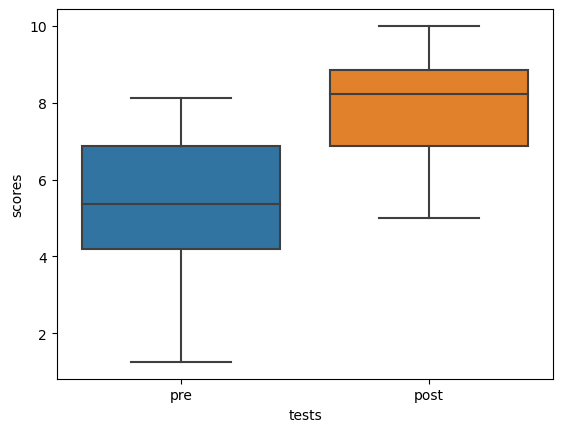

In [12]:
# PS-I
df = psi_scores[['Grade/10.00_pre', 'Grade/10.00_post']].rename(columns={'Grade/10.00_pre': 'pre', 'Grade/10.00_post': 'post'})
sns.boxplot(data=df).set(xlabel='tests', ylabel='scores')
stats.kstest(np.array(psi_scores[['Grade/10.00_post']].values).flatten(), np.array(psi_scores[['Grade/10.00_pre']].values).flatten())

In [13]:
np.array(psi_scores[['Grade/10.00_post']].values).flatten()

array([ 7.25, 10.  ,  6.88,  5.  ,  9.38,  8.63,  8.63,  6.88,  5.63,
        8.66,  9.38,  7.84])

KstestResult(statistic=0.4444444444444444, pvalue=0.35170711641299873, statistic_location=3.39, statistic_sign=-1)

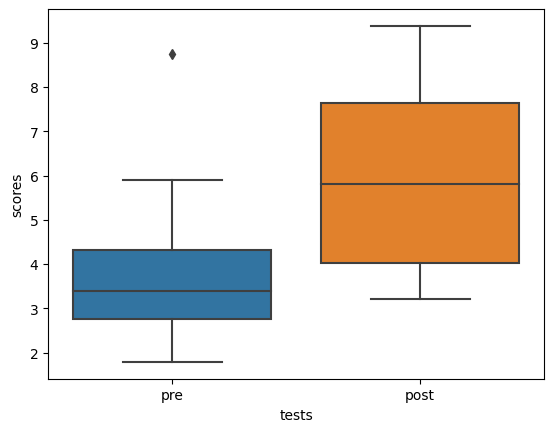

In [14]:
# I-PS
df = ips_scores[['Grade/10.00_pre', 'Grade/10.00_post']].rename(columns={'Grade/10.00_pre': 'pre', 'Grade/10.00_post': 'post'})
sns.boxplot(data=df).set(xlabel='tests', ylabel='scores')
stats.kstest(np.array(ips_scores[['Grade/10.00_post']].values).flatten(), np.array(ips_scores[['Grade/10.00_pre']].values).flatten())

Calulating learning gain as $learning\_gain = Grade/10.00\_post - Grade/10.00\_pre$

In [15]:
ips_scores['learning_gain'] = ips_scores['Grade/10.00_post'] - ips_scores['Grade/10.00_pre'] 
psi_scores['learning_gain'] = psi_scores['Grade/10.00_post']- psi_scores['Grade/10.00_pre']

<Axes: xlabel='condition', ylabel='learning_gain'>

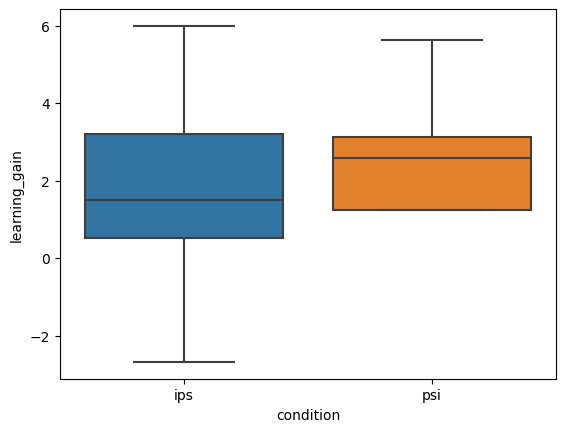

In [16]:
df = pd.concat([ips_scores[['learning_gain', 'condition']], psi_scores[['learning_gain', 'condition']]])
sns.boxplot(x='condition', y='learning_gain', data=df)

In [17]:
pg.ttest(df[df['condition'] == 'psi']['learning_gain'], df[df['condition'] == 'ips']['learning_gain'], paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.734601,11.05689,two-sided,0.477873,"[-1.4, 2.81]",0.354411,0.477,0.119031


The statistical test with a p-value of 0.55 suggests that, at the moment, there is no significant difference. Now, if we shift our focus to relative gain instead of absolute gain, we might gain a different perspective.

In [18]:
ips_scores['rel_gain'] = (ips_scores['Grade/10.00_post'] - ips_scores['Grade/10.00_pre'])/ (10.0 - ips_scores['Grade/10.00_pre']) 
psi_scores['rel_gain'] = (psi_scores['Grade/10.00_post']- psi_scores['Grade/10.00_pre']) /  (10.0 - psi_scores['Grade/10.00_pre']) 


In [19]:
psi_scores

,Surname_pre,First name_pre,Email address,State_pre,Started on_pre,Completed_pre,Time taken_pre,Grade/10.00_pre,Q. 1 /2.50_pre,Q. 2 /2.50_pre,...,Completed_post,Time taken_post,Grade/10.00_post,Q. 1 /2.50_post,Q. 2 /2.50_post,Q. 3 /2.50_post,Q. 6 /2.50_post,condition,learning_gain,rel_gain
0,Rayan,Rami,rayan.rami@unil.ch,Finished,21 November 2023 12:34 PM,21 November 2023 12:44 PM,9 mins 55 secs,4.25,0.50,1.25,...,21 November 2023 1:18 PM,10 mins,7.25,2.50,2.50,1.25,1.00,psi,3.00,0.521739
1,dp13,dp13,dp.moodle2023+13@gmail.com,Finished,22 November 2023 7:31 PM,22 November 2023 7:41 PM,9 mins 51 secs,6.88,0.00,1.88,...,22 November 2023 8:06 PM,4 mins 33 secs,10.00,2.50,2.50,2.50,2.50,psi,3.12,1.000000
2,17,17,dp.moodle2023+17@gmail.com,Finished,25 November 2023 11:03 AM,25 November 2023 11:13 AM,10 mins,5.63,2.50,0.63,...,25 November 2023 11:56 AM,10 mins,6.88,1.25,2.50,1.88,1.25,psi,1.25,0.286041
3,18,18,dp.moodle2023+18@gmail.com,Finished,25 November 2023 12:42 PM,25 November 2023 12:50 PM,8 mins 11 secs,3.75,1.25,0.00,...,25 November 2023 1:24 PM,9 mins 52 secs,5.00,1.25,2.50,1.25,0.00,psi,1.25,0.200000
4,dp12,dp12,dp.moodle2023+12@gmail.com,Finished,27 November 2023 10:12 AM,27 November 2023 10:22 AM,10 mins 1 sec,6.88,2.50,1.88,...,29 November 2023 5:15 PM,6 mins 4 secs,9.38,2.50,2.50,1.88,2.50,psi,2.50,0.801282
5,MARKAR,Aman,amanmarkar@yahoo.co.uk,Finished,28 November 2023 2:47 PM,28 November 2023 2:57 PM,10 mins 1 sec,7.38,2.50,0.63,...,28 November 2023 3:24 PM,4 mins 43 secs,8.63,2.50,2.50,1.88,1.75,psi,1.25,0.477099
6,20,20,dp.moodle2023+20@gmail.com,Finished,28 November 2023 4:16 PM,28 November 2023 4:26 PM,10 mins,4.88,1.25,0.63,...,28 November 2023 5:16 PM,10 mins,8.63,2.50,2.50,1.88,1.75,psi,3.75,0.732422
7,programming,dynamic,dp.moodle2023@gmail.com,Finished,28 November 2023 5:19 PM,28 November 2023 5:29 PM,10 mins 1 sec,1.25,0.00,1.25,...,28 November 2023 7:59 PM,10 mins 7 secs,6.88,0.00,2.50,1.88,2.50,psi,5.63,0.643429
8,27,dp,dp.moodle2023+27@gmail.com,Finished,29 November 2023 7:34 PM,29 November 2023 7:44 PM,10 mins 1 sec,4.02,0.00,1.88,...,29 November 2023 8:18 PM,10 mins,5.63,1.25,2.50,1.88,0.00,psi,1.61,0.269231
9,26,dp,dp.moodle2023+26@gmail.com,Finished,3 December 2023 3:59 PM,3 December 2023 4:09 PM,10 mins 1 sec,5.54,2.50,1.25,...,3 December 2023 5:02 PM,7 mins 7 secs,8.66,2.50,1.79,1.88,2.50,psi,3.12,0.699552


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.070882,11.456103,two-sided,0.061681,"[-0.02, 0.69]",0.992625,1.643,0.570089


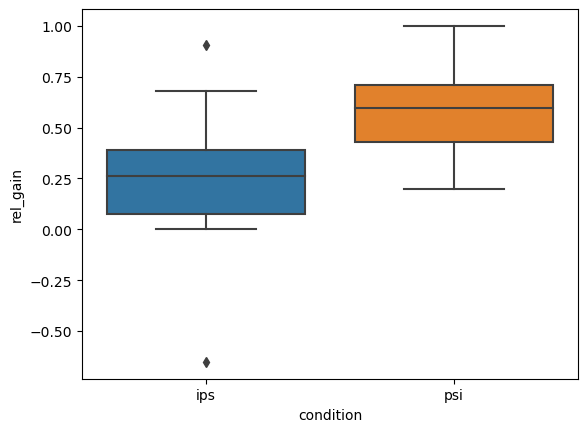

In [20]:
df = pd.concat([ips_scores[['rel_gain', 'condition']], psi_scores[['rel_gain', 'condition']]])
sns.boxplot(x='condition', y='rel_gain', data=df)
pg.ttest(df[df['condition'] == 'psi']['rel_gain'], df[df['condition'] == 'ips']['rel_gain'])

With a p-value of 0.09, we still fail to reject the null hypothesis. 

# Anova with multiple factors

Previously, we only used aggregation which is often a [bad idea in statistics](https://en.wikipedia.org/wiki/Simpson%27s_paradox). Now, we'll include individual-level data such as personal information and problem-solving metadata for a more comprehensive analysis.

In [21]:
scores = pd.concat([psi_scores, ips_scores])
scores

,Surname_pre,First name_pre,Email address,State_pre,Started on_pre,Completed_pre,Time taken_pre,Grade/10.00_pre,Q. 1 /2.50_pre,Q. 2 /2.50_pre,...,Completed_post,Time taken_post,Grade/10.00_post,Q. 1 /2.50_post,Q. 2 /2.50_post,Q. 3 /2.50_post,Q. 6 /2.50_post,condition,learning_gain,rel_gain
0,Rayan,Rami,rayan.rami@unil.ch,Finished,21 November 2023 12:34 PM,21 November 2023 12:44 PM,9 mins 55 secs,4.25,0.50,1.25,...,21 November 2023 1:18 PM,10 mins,7.25,2.50,2.50,1.25,1.0,psi,3.00,0.521739
1,dp13,dp13,dp.moodle2023+13@gmail.com,Finished,22 November 2023 7:31 PM,22 November 2023 7:41 PM,9 mins 51 secs,6.88,0.00,1.88,...,22 November 2023 8:06 PM,4 mins 33 secs,10.00,2.50,2.50,2.50,2.5,psi,3.12,1.000000
2,17,17,dp.moodle2023+17@gmail.com,Finished,25 November 2023 11:03 AM,25 November 2023 11:13 AM,10 mins,5.63,2.50,0.63,...,25 November 2023 11:56 AM,10 mins,6.88,1.25,2.50,1.88,1.25,psi,1.25,0.286041
3,18,18,dp.moodle2023+18@gmail.com,Finished,25 November 2023 12:42 PM,25 November 2023 12:50 PM,8 mins 11 secs,3.75,1.25,0.0,...,25 November 2023 1:24 PM,9 mins 52 secs,5.00,1.25,2.50,1.25,0.0,psi,1.25,0.200000
4,dp12,dp12,dp.moodle2023+12@gmail.com,Finished,27 November 2023 10:12 AM,27 November 2023 10:22 AM,10 mins 1 sec,6.88,2.50,1.88,...,29 November 2023 5:15 PM,6 mins 4 secs,9.38,2.50,2.50,1.88,2.5,psi,2.50,0.801282
5,MARKAR,Aman,amanmarkar@yahoo.co.uk,Finished,28 November 2023 2:47 PM,28 November 2023 2:57 PM,10 mins 1 sec,7.38,2.50,0.63,...,28 November 2023 3:24 PM,4 mins 43 secs,8.63,2.50,2.50,1.88,1.75,psi,1.25,0.477099
6,20,20,dp.moodle2023+20@gmail.com,Finished,28 November 2023 4:16 PM,28 November 2023 4:26 PM,10 mins,4.88,1.25,0.63,...,28 November 2023 5:16 PM,10 mins,8.63,2.50,2.50,1.88,1.75,psi,3.75,0.732422
7,programming,dynamic,dp.moodle2023@gmail.com,Finished,28 November 2023 5:19 PM,28 November 2023 5:29 PM,10 mins 1 sec,1.25,0.00,1.25,...,28 November 2023 7:59 PM,10 mins 7 secs,6.88,0.00,2.50,1.88,2.5,psi,5.63,0.643429
8,27,dp,dp.moodle2023+27@gmail.com,Finished,29 November 2023 7:34 PM,29 November 2023 7:44 PM,10 mins 1 sec,4.02,0.00,1.88,...,29 November 2023 8:18 PM,10 mins,5.63,1.25,2.50,1.88,0.0,psi,1.61,0.269231
9,26,dp,dp.moodle2023+26@gmail.com,Finished,3 December 2023 3:59 PM,3 December 2023 4:09 PM,10 mins 1 sec,5.54,2.50,1.25,...,3 December 2023 5:02 PM,7 mins 7 secs,8.66,2.50,1.79,1.88,2.5,psi,3.12,0.699552


In [22]:
psi_personal = pd.read_csv(datapath + ps_i + '/' + psi_files[4]).fillna(0).replace('-', 0)
ips_personal = pd.read_csv(datapath + i_ps + '/' + ips_files[4]).fillna(0).replace('-', 0)

ips_personal.loc[8] = ['dp', 'dp', 'dp.moodle2023+1@gmail.com', 'Finished', '22 November 2023 9:55 PM', '22 November 2023 9:59 PM', '4 mins','18-24 years', 'High School Diploma or Equivalen', 'Yes, in Python', 'True', 'True','{8}{1}{False}', 4, '{The first function has a lesser time complexity than the second.}']
personal = pd.concat([psi_personal, ips_personal])
final_csv = pd.merge(personal, scores, on='Email address') # Using Email address as the unique identifier

In [23]:
final_csv

,Surname,First name,Email address,State,Started on,Completed,Time taken,Response 1,Response 2,Response 3,...,Completed_post,Time taken_post,Grade/10.00_post,Q. 1 /2.50_post,Q. 2 /2.50_post,Q. 3 /2.50_post,Q. 6 /2.50_post,condition,learning_gain,rel_gain
0,Rayan,Rami,rayan.rami@unil.ch,Finished,21 November 2023 12:30 PM,21 November 2023 12:34 PM,3 mins 22 secs,18-24 years,High School Diploma or Equivalent,"Yes, in Python",...,21 November 2023 1:18 PM,10 mins,7.25,2.50,2.50,1.25,1.0,psi,3.00,0.521739
1,dp13,dp13,dp.moodle2023+13@gmail.com,Finished,22 November 2023 7:28 PM,22 November 2023 7:31 PM,2 mins 43 secs,18-24 years,High School Diploma or Equivalent,"Yes, in Python",...,22 November 2023 8:06 PM,4 mins 33 secs,10.00,2.50,2.50,2.50,2.5,psi,3.12,1.000000
2,17,17,dp.moodle2023+17@gmail.com,Finished,25 November 2023 10:59 AM,25 November 2023 11:03 AM,3 mins 39 secs,25-34 years,Bachelor's Degree,"Yes, in Python",...,25 November 2023 11:56 AM,10 mins,6.88,1.25,2.50,1.88,1.25,psi,1.25,0.286041
3,18,18,dp.moodle2023+18@gmail.com,Finished,25 November 2023 12:29 PM,25 November 2023 12:40 PM,10 mins 53 secs,25-34 years,Master's Degree,"Yes, in Python",...,25 November 2023 1:24 PM,9 mins 52 secs,5.00,1.25,2.50,1.25,0.0,psi,1.25,0.200000
4,dp12,dp12,dp.moodle2023+12@gmail.com,Finished,27 November 2023 10:06 AM,27 November 2023 10:11 AM,4 mins 59 secs,18-24 years,Bachelor's Degree,"Yes, in Python",...,29 November 2023 5:15 PM,6 mins 4 secs,9.38,2.50,2.50,1.88,2.5,psi,2.50,0.801282
5,MARKAR,Aman,amanmarkar@yahoo.co.uk,Finished,28 November 2023 2:40 PM,28 November 2023 2:45 PM,4 mins 52 secs,18-24 years,Bachelor's Degree,"Yes, in Python",...,28 November 2023 3:24 PM,4 mins 43 secs,8.63,2.50,2.50,1.88,1.75,psi,1.25,0.477099
6,20,20,dp.moodle2023+20@gmail.com,Finished,28 November 2023 4:07 PM,28 November 2023 4:14 PM,7 mins 35 secs,25-34 years,Master's Degree,"Yes, in Python",...,28 November 2023 5:16 PM,10 mins,8.63,2.50,2.50,1.88,1.75,psi,3.75,0.732422
7,programming,dynamic,dp.moodle2023@gmail.com,Finished,28 November 2023 5:14 PM,28 November 2023 5:19 PM,4 mins 34 secs,25-34 years,Master's Degree,"Yes, in Python",...,28 November 2023 7:59 PM,10 mins 7 secs,6.88,0.00,2.50,1.88,2.5,psi,5.63,0.643429
8,27,dp,dp.moodle2023+27@gmail.com,Finished,29 November 2023 7:30 PM,29 November 2023 7:33 PM,3 mins 29 secs,18-24 years,Bachelor's Degree,"Yes, in Python",...,29 November 2023 8:18 PM,10 mins,5.63,1.25,2.50,1.88,0.0,psi,1.61,0.269231
9,26,dp,dp.moodle2023+26@gmail.com,Finished,3 December 2023 3:50 PM,3 December 2023 3:59 PM,9 mins 7 secs,25-34 years,Master's Degree,"Yes, in Python",...,3 December 2023 5:02 PM,7 mins 7 secs,8.66,2.50,1.79,1.88,2.5,psi,3.12,0.699552
